Before you turn this lab in, make sure everything runs as expected. **Restart and run all cells** (in the menubar, select Kernel$\rightarrow$Restart & Run All) then check the output is as expected and there are no errors.  Also remember to **Save** before uploading this file (File$\rightarrow$Save and Checkpoint).

---

# <div align="center">Quantum Computer Systems Design</div>&nbsp;  <div align="center">Lab 1</div> 

### 1. Quantum Logic Warm-up
How does a quantum computer store and manipulate information? In this problem, we will compare and contrast quantum logic against its classical counterpart, boolean logic.

#### 1.1 Classical coin-flip gate.
Suppose CCOIN is a classical conditional random gate that tosses a biased coin if the input is $|1\rangle$. Specifically, if the input is $|0\rangle$, CCOIN does nothing, otherwise, it generates bit $|0\rangle$ with probability $1/4$ and generates bit $|1\rangle$ with probability $3/4$. Schematically, CCOIN gate takes one input bit and returns one output bit, as shown below:  
$$
\text{CCOIN} = \begin{cases}|0\rangle \rightarrow |0\rangle, \\ |1\rangle \rightarrow 1/4|0\rangle + 3/4|1\rangle. \end{cases}
$$&nbsp;
Notice that, in our notation, a *random bit* is written as $p|0\rangle+(1-p)|1\rangle$, if it is $|0\rangle$ with probability $p$ and generates bit $|1\rangle$ with probability $1-p$.

#### 1.1.1
Give the random bit resulting from applying the CCOIN gate on an input bit $1/3|0\rangle+2/3|1\rangle$. Enter your solution below by giving the probability of outputing $|0\rangle$.

For all questions, you may either give a numeric answer such as `0.2928932188` or an expression like `1-np.sin(np.pi/4)`  

$$
\color{yellow}
\begin{equation}
\begin{split}   
\text{CCOIN}(\frac{1}{3}|0\rangle + \frac{2}{3}|1\rangle) &= \frac{1}{3} \text{CCOIN}|0\rangle + \frac{2}{3} \text{CCOIN} |1\rangle \\
&= \frac{1}{3} |0\rangle + \frac{2}{3} \left( \frac{1}{4}|0\rangle + \frac{3}{4}|1\rangle \right) \\
&= \frac{1}{2}|0\rangle + \frac{1}{2}|1\rangle
\end{split}
\end{equation}
$$

In [1]:
import numpy as np

prob_output_0 = (
    0.5
)
print(prob_output_0)

0.5


In [2]:
# Do not delete this cell
# The autograder will test the value stored in prob_output_0
# Pass all the below test(s) and the hidden tests for full credit
assert 0 <= prob_output_0 <= 1, 'The probability should be between 0 and 1'

#### 1.1.2 
Give the random bit resulting from applying the CCOIN gate *twice* on an input bit $2/5|0\rangle+3/5|1\rangle$. Enter your solution below by giving the final probability of outputing $|0\rangle$. 
$$
\color{yellow}
\begin{equation}
\begin{split}   
\text{CCOIN}(\text{CCOIN}(\frac{2}{5}|0\rangle + \frac{3}{5}|1\rangle)) &= \text{CCOIN}(\frac{2}{5} \text{CCOIN}|0\rangle + \frac{3}{5} \text{CCOIN} |1\rangle) \\
&= \text{CCOIN}(\frac{2}{5} |0\rangle + \frac{3}{5} \left( \frac{1}{4}|0\rangle + \frac{3}{4}|1\rangle \right)) \\
&= \text{CCOIN}(\frac{11}{20}|0\rangle + \frac{9}{20}|1\rangle) \\
&= \frac{11}{20}|0\rangle + \frac{9}{20} \left( \frac{1}{4}|0\rangle + \frac{3}{4}|1\rangle \right)) \\
&= \frac{53}{80}|0\rangle + \frac{27}{80}|1\rangle 
\end{split} 
\end{equation}
$$

In [3]:
prob_twice_0 = 53./80

print(prob_twice_0)

0.6625


In [4]:
# Do not delete this cell
# Pass all the below test(s) and the hidden tests for full credit
assert 0 <= prob_twice_0 <= 1, 'The probability should be between 0 and 1'

#### 1.2 Classical Coin to Quantum Coin
Given our definition of the CCOIN gate, we need to implement a biased coin. The following simple classical program invokes a pseudo random generator in `numpy.random`. (Feel free to execute the following code to see the sampling outcome.)

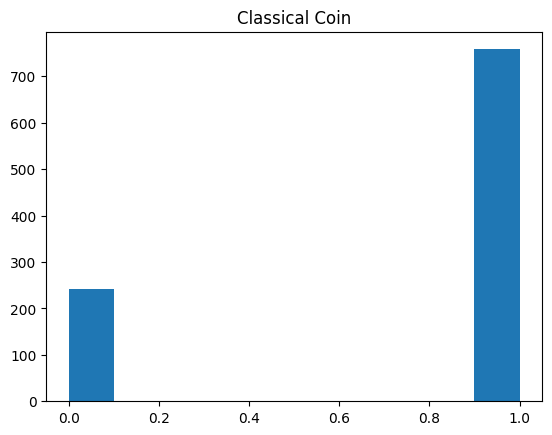

In [5]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

def coin_classical():
    return np.random.choice([0,1], p=[1./4, 3./4])
        
counts_classical = [coin_classical() for _ in range(1000)]
plt.hist(counts_classical, 10,
         histtype='bar')
plt.title('Classical Coin')
plt.show()

#### 1.2.1 
Now, suppose we want to implement a quantum coin. Give a quantum circuit that implements the same biased coin from above, that is the measurement outcome of a qubit is bit $|0\rangle$ with probability $1/4$ and bit $|1\rangle$ with probability $3/4$. You may use up to *two* qubits (initialized to $|00\rangle$) and any built in gates. (Hint: you may want a controlled-Hadamard gate: `CHGate`)

<style>
yellow { color: yellow }
</style>
<yellow>The state of a qubit is represented by a vector in a two-dimensional complex Hilbert space</yellow>
$$
\color{yellow}
| \psi \rangle = \alpha|0\rangle + \beta|1\rangle
$$
<yellow>The probability is given by</yellow> $|\alpha|^2$<yellow> and </yellow>$|\beta|^2$
<yellow>So here we want</yellow>
$$
\color{yellow}
|\alpha|^2 = \frac{1}{4} \\
$$
$$
\color{yellow}
|\beta|^2 = \frac{3}{4}
$$
<yellow>for example</yellow>
$$
\color{yellow}
|\alpha| = \frac{1}{2} \text{ and } |\beta| = \frac{\sqrt{3}}{2}
$$
<yellow>There are many possibilities but we can apply a </yellow>$R_y$ <yellow>gate with an angle </yellow>$\theta$
$$
\color{yellow}
R_y |0\rangle = cos\left(\frac{\theta}{2}\right) |0\rangle + sin\left(\frac{\theta}{2}\right)|1\rangle
$$
<yellow>We can choose : </yellow> $\theta=\frac{2\pi}{3}$

In [14]:
import math

from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister
from qiskit import Aer, execute
from qiskit.circuit.library import CHGate
from qiskit.tools.visualization import plot_histogram

coin_quantum = QuantumCircuit(2, 1)
coin_quantum.append(CHGate(), [0, 1])

theta = 2 * math.pi / 3 
coin_quantum.ry(theta, 0)
coin_quantum.append(CHGate(), [0, 1])

coin_quantum.measure(0, 0)

coin_quantum.draw(fold=-1)

┌──────────┐     ┌─┐
q_0: ──■──┤ Ry(2π/3) ├──■──┤M├
     ┌─┴─┐└──────────┘┌─┴─┐└╥┘
q_1: ┤ H ├────────────┤ H ├─╫─
     └───┘            └───┘ ║ 
c: 1/═══════════════════════╩═
                            0

Sampled outcomes: {'1': 743, '0': 257}


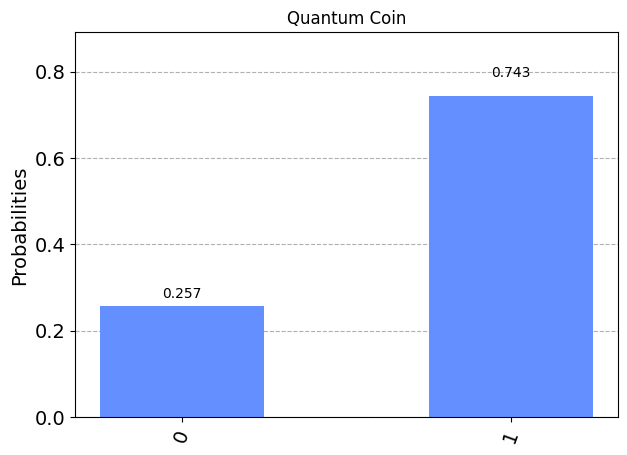

In [15]:
# Testing your circuit
simulator = Aer.get_backend('qasm_simulator')  # Use the simulator from qiskit Aer

result = execute(coin_quantum, simulator, shots=1000).result()
counts_quantum = result.get_counts(coin_quantum)
print('Sampled outcomes:', counts_quantum)
plot_histogram(counts_quantum, title='Quantum Coin')

In [8]:
# Do not delete this cell
# Pass all the below test(s) and the hidden tests for full credit
assert len(coin_quantum) > 0, 'Empty circuit, add gates with coin_quantum.<gate_name>(q0, ...)'
assert len(counts_quantum) == 2, 'The circuit should have two possible outcomes'
assert 220 <= counts_quantum['0'] <= 280, 'Probability of |0> should be 1/4'
assert 720 <= counts_quantum['1'] <= 780, 'Probability of |1> should be 3/4'

### 2. Quantum Logic Gates
In this problem, we will review single-qubit quantum gates, and their action on the three principal axes of spin measurement, i.e. $\hat{x}$, $\hat{y}$, and $\hat{z}$. Using the notation in lecture, we denote the pair of eigen-states in each axis as follows: 
* $(|+\rangle, |-\rangle)$ for $\hat{x}$ axis,
* $(|i\rangle, |-i\rangle)$ for $\hat{y}$ axis,
* $(|0\rangle, |1\rangle)$ for $\hat{z}$ axis.

where 
$$
|+\rangle = \frac{1}{\sqrt{2}}(|0\rangle+|1\rangle),
$$
$$
|-\rangle = \frac{1}{\sqrt{2}}(|0\rangle-|1\rangle), 
$$
$$
|i\rangle = \frac{1}{\sqrt{2}}(|0\rangle+i|1\rangle),
$$
$$
|-i\rangle = \frac{1}{\sqrt{2}}(|0\rangle-i|1\rangle).
$$

#### 2.1 Clifford Gates
The single-qubit Clifford gates can be viewed as a map from one eigen-state to another eigen-state. As such, the action of a Clifford gate can be described as how the gate transforms the three eigen-states respectively. For example, for a Hadamard gate and an S gate:
* H gate: $(|+\rangle, |i\rangle, |0\rangle) \rightarrow (|0\rangle, |-i\rangle, |+\rangle)$,
* S gate: $(|+\rangle, |i\rangle, |0\rangle) \rightarrow (|i\rangle, |-\rangle, |0\rangle)$. 

Feel free to verify this mapping by manipulating and executing the code block below.
$$
\color{yellow}
H = \frac{1}{\sqrt{2}}
\begin{pmatrix}
1 & 1 \\
1 & -1
\end{pmatrix}
$$
$$
\color{yellow}
H|+\rangle = \frac{1}{\sqrt{2}}
\begin{pmatrix}
1 & 1 \\
1 & -1
\end{pmatrix}
\frac{1}{\sqrt{2}}
\begin{pmatrix}
1 \\
1 
\end{pmatrix}
=
\begin{pmatrix}
1 \\
0 
\end{pmatrix}
= |0\rangle
$$
$$
\color{yellow}
H|i\rangle = \frac{1}{\sqrt{2}}
\begin{pmatrix}
1 & 1 \\
1 & -1
\end{pmatrix}
\frac{1}{\sqrt{2}}
\begin{pmatrix}
1 \\
i 
\end{pmatrix}
= \frac{1}{2}
\begin{pmatrix}
1+i \\
1-i
\end{pmatrix}
\frac{1}{\sqrt{2}}
\begin{pmatrix}
\frac{1+i}{\sqrt{2}} \\
\frac{1-i}{\sqrt{2}}
\end{pmatrix}
= e^{\frac{i\pi}{4}} \frac{1}{\sqrt{2}}
\begin{pmatrix}
1 \\
-i
\end{pmatrix}
= e^{\frac{i\pi}{4}}|-i\rangle
=|-i\rangle
$$
$$
\color{yellow}
H|0\rangle = \frac{1}{\sqrt{2}}
\begin{pmatrix}
1 & 1 \\
1 & -1
\end{pmatrix}
\begin{pmatrix}
1 \\
0 
\end{pmatrix}
= \frac{1}{\sqrt{2}}
\begin{pmatrix}
1 \\
1 
\end{pmatrix}
= |+\rangle
$$

$$
\color{yellow}
S = 
\begin{pmatrix}
1 & 0 \\
0 & i
\end{pmatrix}
$$
$$
\color{yellow}
S|+\rangle = 
\begin{pmatrix}
1 & 0 \\
0 & i
\end{pmatrix}
\frac{1}{\sqrt{2}}
\begin{pmatrix}
1 \\
1 
\end{pmatrix}
= \frac{1}{\sqrt{2}}
\begin{pmatrix}
1 \\
i 
\end{pmatrix}
= |i\rangle
$$
$$
\color{yellow}
S|i\rangle = 
\begin{pmatrix}
1 & 0 \\
0 & i
\end{pmatrix}
\frac{1}{\sqrt{2}}
\begin{pmatrix}
1 \\
i 
\end{pmatrix}
= \frac{1}{\sqrt{2}}
\begin{pmatrix}
1 \\
-1
\end{pmatrix}
= |-\rangle
$$
$$
\color{yellow}
S|0\rangle = 
\begin{pmatrix}
1 & 0 \\
0 & i
\end{pmatrix}
\begin{pmatrix}
1 \\
0 
\end{pmatrix}
= 
\begin{pmatrix}
1 \\
0 
\end{pmatrix}
= |0\rangle
$$

In [9]:
from math import sqrt
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister
from qiskit import Aer, execute
simulator = Aer.get_backend('statevector_simulator')

qc21demo = QuantumCircuit(1)

test_states = {
    '+': [1/sqrt(2), 1/sqrt(2)], 'i': [1/sqrt(2), 1j/sqrt(2)], '0': [1, 0]
}

for input_name, test_state in test_states.items():
    qc21demo.initialize(test_state, 0)
    qc21demo.h(0)
    state = execute(qc21demo, simulator).result().get_statevector() # execute circuit
    print("H applied to |", input_name, "> gives : ", state) # show amplitudes

for input_name, test_state in test_states.items():
    qc21demo.initialize(test_state, 0)
    qc21demo.s(0)
    state = execute(qc21demo, simulator).result().get_statevector() # execute circuit
    print("S applied to |", input_name, "> gives : ", state) # show amplitudes



H applied to | + > gives :  Statevector([ 1.00000000e+00-6.123234e-17j, -1.00875766e-16+6.123234e-17j],
            dims=(2,))
H applied to | i > gives :  Statevector([0.5+0.5j, 0.5-0.5j],
            dims=(2,))
H applied to | 0 > gives :  Statevector([0.70710678+0.j, 0.70710678+0.j],
            dims=(2,))
S applied to | + > gives :  Statevector([ 0.70710678+0.j        , -0.        +0.70710678j],
            dims=(2,))
S applied to | i > gives :  Statevector([ 0.70710678+0.j, -0.70710678+0.j],
            dims=(2,))
S applied to | 0 > gives :  Statevector([ 1.+0.j, -0.+0.j],
            dims=(2,))


#### 2.1.1
Give the sequence of Hadamard gates and S gates which produces the following map. If the map is not possible, leave the quantum circuit blank.
$$(|+\rangle, |i\rangle, |0\rangle) \rightarrow (|0\rangle, |+\rangle, |i\rangle)$$

In [10]:
qc211 = QuantumCircuit(1)

qc211.h(0)
qc211.s(0)

qc211.draw(fold=-1)

┌───┐┌───┐
q: ┤ H ├┤ S ├
   └───┘└───┘

In [11]:
# Do not delete this cell
# Testing your circuit
# Validate
assert set(g.__class__.__name__ for g, _, _ in list(qc211)
          ).issubset({'HGate', 'SGate'}), (
    'You may only use H and S gates for this problem')

# Simulate every input and check the output
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister
from qiskit import Aer, execute
from qiskit.quantum_info.operators.predicates import matrix_equal
simulator = Aer.get_backend('statevector_simulator')
test_states = {
    '+': [1/sqrt(2), 1/sqrt(2)], '-': [1/sqrt(2), -1/sqrt(2)],
    'i': [1/sqrt(2), 1j/sqrt(2)], '-i': [1/sqrt(2), -1j/sqrt(2)],
    '0': [1, 0], '1': [0, 1],
}
expected_transform = {
    '+': '0', 'i': '+', '0': 'i',
    '-': '1', '-i': '-', '1': '-i',
}
invalid = False
for input_name, output_name in expected_transform.items():
    #print(f'Testing input |{input_name}> with expected output |{output_name}>...')
    # Simulate
    qc_test = QuantumCircuit(1)
    qc_test.initialize(test_states[input_name], 0)
    qc_test += qc211
    state = execute(qc_test, simulator).result().get_statevector() # execute circuit
    state_name = str(state)
    for comp_name, comp_state in test_states.items():
        if matrix_equal(state, comp_state,
                        ignore_phase=True, atol=1e-8, rtol=1e-8):
            state_name = comp_name
    if state_name == output_name:
        print(f'Correct:   |{input_name:>2}> -> |{output_name:>2}>')
    else:
        invalid = True
        print(f'Incorrect: |{input_name:>2}> -> |{state_name:>2}> (expected {output_name:>2})')
assert not invalid, 'At least one output of your circuit is wrong.'

Correct:   | +> -> | 0>
Correct:   | i> -> | +>
Correct:   | 0> -> | i>
Correct:   | -> -> | 1>
Correct:   |-i> -> | ->
Correct:   | 1> -> |-i>


/var/folders/6b/d33yz61x5gg85x6s_tyl7lbh0000gn/T/ipykernel_53961/1091487383.py:28: DeprecationWarning: The QuantumCircuit.__iadd__() method is being deprecated. Use the compose() (potentially with the inplace=True argument) and tensor() methods which are more flexible w.r.t circuit register compatibility.
  qc_test += qc211


#### 2.1.2
Give the sequence of Hadamard gates and S gates which produces the following map. If the map is not possible, leave the quantum circuit blank.
$$(|+\rangle, |i\rangle, |0\rangle) \rightarrow (|+\rangle, |-i\rangle, |1\rangle)$$

In [12]:
qc212 = QuantumCircuit(1)

qc212.h(0)
qc212.s(0)
qc212.s(0)
qc212.h(0)

qc212.draw(fold=-1)

┌───┐┌───┐┌───┐┌───┐
q: ┤ H ├┤ S ├┤ S ├┤ H ├
   └───┘└───┘└───┘└───┘

In [13]:
# Do not delete this cell
# Testing your circuit
# Validate
assert set(g.__class__.__name__ for g, _, _ in list(qc212)
          ).issubset({'HGate', 'SGate'}), (
    'You may only use H and S gates for this problem')

# Don't forget to test that your circuit has the correct output for every input
simulator = Aer.get_backend('statevector_simulator')
test_states = {
    '+': [1/sqrt(2), 1/sqrt(2)], 'i': [1/sqrt(2), 1j/sqrt(2)], '0': [1, 0]
}
expected_transform = {
    '+': '+', 'i': '-i', '0': '1'
}
invalid = False
for input_name, output_name in expected_transform.items():
    #print(f'Testing input |{input_name}> with expected output |{output_name}>...')
    # Simulate
    qc_test = QuantumCircuit(1)
    qc_test.initialize(test_states[input_name], 0)
    qc_test = qc_test.compose(qc212)
    state = execute(qc_test, simulator).result().get_statevector() # execute circuit
    state_name = str(state)
    for comp_name, comp_state in all_states.items():
        if matrix_equal(state, comp_state,
                        ignore_phase=True, atol=1e-8, rtol=1e-8):
            state_name = comp_name
    if state_name == output_name:
        print(f'Correct:   |{input_name:>2}> -> |{output_name:>2}>')
    else:
        invalid = True
        print(f'Incorrect: |{input_name:>2}> -> |{state_name:>2}> (expected {output_name:>2})')
assert not invalid, 'At least one output of your circuit is wrong.'

NameError: name 'all_states' is not defined

#### 2.1.3
Give the sequence of Hadamard gates and S gates which produces the following map. If the map is not possible, leave the quantum circuit blank.
$$(|+\rangle, |i\rangle, |0\rangle) \rightarrow (|0\rangle, |i\rangle, |+\rangle)$$

In [ ]:
qc213 = QuantumCircuit(1)

# Write your quantum gates here:
# there is no sequence with a length < 20

qc213.draw(fold=-1)

In [ ]:
# Do not delete this cell
# Testing your circuit
# Validate
assert set(g.__class__.__name__ for g, _, _ in list(qc213)
          ).issubset({'HGate', 'SGate'}), (
    'You may only use H and S gates for this problem')

# Don't forget to test that your circuit has the correct output for every input
simulator = Aer.get_backend('statevector_simulator')
test_states = {
    '+': [1/sqrt(2), 1/sqrt(2)], 'i': [1/sqrt(2), 1j/sqrt(2)], '0': [1, 0]
}
expected_transform = {
    '+': '0', 'i': 'i', '0': '+'
}
invalid = False
for input_name, output_name in expected_transform.items():
    #print(f'Testing input |{input_name}> with expected output |{output_name}>...')
    # Simulate
    qc_test = QuantumCircuit(1)
    qc_test.initialize(test_states[input_name], 0)
    qc_test = qc_test.compose(qc213)
    state = execute(qc_test, simulator).result().get_statevector() # execute circuit
    state_name = str(state)
    for comp_name, comp_state in all_states.items():
        if matrix_equal(state, comp_state,
                        ignore_phase=True, atol=1e-8, rtol=1e-8):
            state_name = comp_name
    if state_name == output_name:
        print(f'Correct:   |{input_name:>2}> -> |{output_name:>2}>')
    else:
        invalid = True
        print(f'Incorrect: |{input_name:>2}> -> |{state_name:>2}> (expected {output_name:>2})')
assert not invalid, 'At least one output of your circuit is wrong.'

#### 2.1.4
Give the sequence of Hadamard gates and S gates which produces the following map. If the map is not possible, leave the quantum circuit blank.
$$(|+\rangle, |i\rangle, |0\rangle) \rightarrow (|1\rangle, |i\rangle, |+\rangle)$$

In [ ]:
qc214 = QuantumCircuit(1)

qc214.s(0)
qc214.s(0)
qc214.h(0)

qc214.draw(fold=-1)

In [ ]:
# Do not delete this cell
# Testing your circuit
# Validate
assert set(g.__class__.__name__ for g, _, _ in list(qc214)
          ).issubset({'HGate', 'SGate'}), (
    'You may only use H and S gates for this problem')

# Don't forget to test that your circuit has the correct output for every input
simulator = Aer.get_backend('statevector_simulator')
test_states = {
    '+': [1/sqrt(2), 1/sqrt(2)], 'i': [1/sqrt(2), 1j/sqrt(2)], '0': [1, 0]
}
expected_transform = {
    '+': '1', 'i': 'i', '0': '+'
}
invalid = False
for input_name, output_name in expected_transform.items():
    #print(f'Testing input |{input_name}> with expected output |{output_name}>...')
    # Simulate
    qc_test = QuantumCircuit(1)
    qc_test.initialize(test_states[input_name], 0)
    qc_test = qc_test.compose(qc214)
    state = execute(qc_test, simulator).result().get_statevector() # execute circuit
    state_name = str(state)
    for comp_name, comp_state in all_states.items():
        if matrix_equal(state, comp_state,
                        ignore_phase=True, atol=1e-8, rtol=1e-8):
            state_name = comp_name
    if state_name == output_name:
        print(f'Correct:   |{input_name:>2}> -> |{output_name:>2}>')
    else:
        invalid = True
        print(f'Incorrect: |{input_name:>2}> -> |{state_name:>2}> (expected {output_name:>2})')
assert not invalid, 'At least one output of your circuit is wrong.'

#### 2.1.5
Give the sequence of Hadamard gates and S gates which produces the following map. If the map is not possible, leave the quantum circuit blank.
$$(|+\rangle, |i\rangle, |0\rangle) \rightarrow (|1\rangle, |-\rangle, |i\rangle)$$

In [ ]:
qc215 = QuantumCircuit(1)

qc215.s(0)
qc215.s(0)
qc215.h(0)
qc215.s(0)

qc215.draw(fold=-1)

In [ ]:
# Do not delete this cell
# Testing your circuit
# Validate
assert set(g.__class__.__name__ for g, _, _ in list(qc215)
          ).issubset({'HGate', 'SGate'}), (
    'You may only use H and S gates for this problem')

# Don't forget to test that your circuit has the correct output for every input
simulator = Aer.get_backend('statevector_simulator')
test_states = {
    '+': [1/sqrt(2), 1/sqrt(2)], 'i': [1/sqrt(2), 1j/sqrt(2)], '0': [1, 0]
}
expected_transform = {
    '+': '1', 'i': '-', '0': 'i'
}
invalid = False
for input_name, output_name in expected_transform.items():
    #print(f'Testing input |{input_name}> with expected output |{output_name}>...')
    # Simulate
    qc_test = QuantumCircuit(1)
    qc_test.initialize(test_states[input_name], 0)
    qc_test = qc_test.compose(qc215)
    state = execute(qc_test, simulator).result().get_statevector() # execute circuit
    state_name = str(state)
    for comp_name, comp_state in all_states.items():
        if matrix_equal(state, comp_state,
                        ignore_phase=True, atol=1e-8, rtol=1e-8):
            state_name = comp_name
    if state_name == output_name:
        print(f'Correct:   |{input_name:>2}> -> |{output_name:>2}>')
    else:
        invalid = True
        print(f'Incorrect: |{input_name:>2}> -> |{state_name:>2}> (expected {output_name:>2})')
assert not invalid, 'At least one output of your circuit is wrong.'